LOSS FUNCTIONS:
One of the loss functions we know is the RMSE which is used for regression problems.
But we are making a classifier so we have to use a loss function that is meant for classification. The output of a NN is confidence scores / probability distribution.
In general,  the choice of loss function for a NN which uses the softmax activation function
in its output layer is the  CATEGORICAL CROSS-ENTROPY:
L = -sum(y_target*log(y_predicted))

ONE HOT ENCODING:
Classes : n(say 4)
Label : 0
One-hot = [1,0,0,0]
Label = 1
One-hot: [0,1,0,0]
etc......

Natural Logarithm: log base e = ln
solves for x in  e^x = b

In [2]:
import numpy as np
import math
b = 5.2
print(math.log(b))
print(math.e**np.log(b))

1.6486586255873816
5.199999999999999


Classes : 3 . 
Label : 0 . 
One-hot(y_target) = [1,0,0] . 
prediction =  [0.7,0.1,0.2] .
Loss = -sum(y_target*ln(prediction)) = -(1*ln(0.7) + 0*ln(0.1)+ 0*ln(0.2))

In [3]:
smx_output = np.array([0.6, 0.59 ,0.55])
exp = np.exp(smx_output)
prob = exp/np.sum(exp)
print(prob)
print(smx_output[np.argmax(smx_output)])


[0.33998812 0.33660518 0.3234067 ]
0.6


In [4]:
softmax_outputs = [0.7 , 0.1 , 0.2]
#target_class  = 0
target_one_hot = [1,0,0]
loss = -(math.log(softmax_outputs[0])*target_one_hot[0] 
         + math.log(softmax_outputs[1])*target_one_hot[1] 
         + math.log(softmax_outputs[2])*target_one_hot[2])
print(loss)
# Due to the nature of the one-hot vector we can safely calculate the loss as : 
# log(softmax_output[desired target index])ssalt = -math.log(softmax_outputs[0])
lossalt = -(math.log(softmax_outputs[0]))
print(lossalt)

0.35667494393873245
0.35667494393873245


Categorical cross-entropy compares 2 probability distributions( output of the softmax & the one-hot target vector)
Suppose there are 3 categories prasad gourish and rupam (0 , 1 , 2)
We have inputs such that (prasad , gourish ,gourish)

In [5]:
softmax_output_batch = np.array([[0.7,0.1,0.2],
                         [0.1,0.5,0.4],
                         [0.02,0.9,0.08]])
class_targets = [0,1,1]
print(softmax_output_batch[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [6]:
los = -np.log(softmax_output_batch[range(len(softmax_output_batch)),class_targets])
print(los)
print("average loss = ", np.mean(los))

[0.35667494 0.69314718 0.10536052]
average loss =  0.38506088005216804


In [7]:
softmax_output_batch2 = np.array([[0.7,0.1,0.2],
                         [0.1,0.5,0.4],
                         [0.02,0.9,0.08]])
class_targets2 = np.array([[1,0,0],
                           [0,1,0],
                           [0,1,0]])
if len(class_targets2.shape) == 1:
    confidence  =softmax_output_batch2[(range(len(softmax_output_batch2)),class_targets2)]
elif len(class_targets2.shape) ==  2:
    confidences = np.sum(softmax_output_batch2* class_targets2,axis= 1)
print(confidences)
loss2 = -np.log(confidences)
print(np.mean(loss2))

[0.7 0.5 0.9]
0.38506088005216804


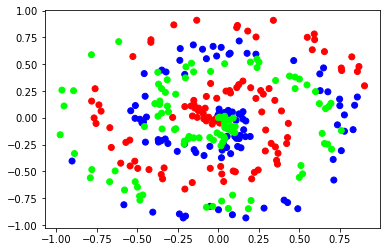

(300, 2)


In [8]:
import matplotlib.pyplot as plt
def spiral_data(points, classes):
    Xsp = np.zeros((points*classes, 2))
    ysp = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        Xsp[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        ysp[ix] = class_number
    return Xsp, ysp
Xsp, ysp = spiral_data(100,3)

plt.scatter(Xsp[:,0], Xsp[:,1], c = ysp, cmap = 'brg')
plt.show()

print(np.shape(Xsp))


#creating a loss class

In [9]:
-np.log(0)
#i'll add a negligible value to all my confidences
print(1e-8)


1e-08


<ipython-input-9-a41f4c934b8b>:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)


In [10]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output , y)
        #calculate mean loss
        data_loss = np.mean(sample_losses)
        return data_loss
class CategoricalCrossEntropy_Loss(Loss):
    def forward(self , y_pred , y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred , 1e-8 , 1-1e-8)
               
        if len(y_true.shape) ==  1:
            confi = y_pred_clipped[range(samples),y_true]
        if len(y_true.shape) == 2:
            confi =  np.sum(y_pred_clipped * y_true,axis = 1)
        
        losss = -np.log(confi)
        return losss
loss_function = CategoricalCrossEntropy_Loss()
lo = loss_function.calculate(softmax_output_batch2, class_targets2)
print(lo)

0.38506088005216804


In [11]:
class layer:
    def __init__(self, no_of_inputs , no_of_neurons):
        self.weights = np.random.randn(no_of_inputs , no_of_neurons)
        self.biases = np.zeros((1,no_of_neurons))
    def forward(self, inputs):
        out = np.dot(inputs, self.weights)
        self.outp = out +self.biases
class ReLU :
    def forward(self, inputs):
        self.out = np.maximum(0, inputs)
class Softmax:
    def forward(self, inputs):
        exp_batch = np.exp(inputs -  np.max(inputs , axis = 1 , keepdims = True))
        prob= exp_batch/np.sum(exp_batch , axis=1, keepdims = True)
        self.out = prob


In [12]:
layer1r = layer(2,3)
relu_activation = ReLU() 
layer2r = layer(3,3)
relu_activation2 = ReLU() 
    
layer1r.forward(Xsp)
relu_activation.forward(layer1r.outp)
#print(layer1r.outp[2:])
layer2r.forward(relu_activation.out)

relu_activation2.forward(layer2r.outp)

smax = Softmax()
smax.forward(relu_activation2.out)

loss_function1 = CategoricalCrossEntropy_Loss()
lo1 = loss_function1.calculate(smax.out, ysp)
print(lo1)

acc = np.mean(smax.out == ysp)
print(acc)

1.1617245038924664
0.0


<ipython-input-12-63f47b05de3e>:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc = np.mean(smax.out == ysp)


OPTIMIZATION:


In [15]:
from sys import maxsize

layer12r = layer(2,3)
relu_activation12 = ReLU() 
layer22r = layer(3,3)
relu_activation22 = ReLU() 
smax2 = Softmax()
loss_function22 = CategoricalCrossEntropy_Loss()

minimal_loss = maxsize
optimized_layer12r_weights = layer12r.weights.copy()
optimized_layer22r_weights = layer22r.weights.copy()
optimized_layer12r_biases = layer12r.biases.copy()
optimized_layer22r_biases = layer22r.biases.copy()

for epochs in range(10000):
    layer12r.weights += 0.01
    layer12r.biases += 0.1
    
    layer22r.weights += 0.03
    layer22r.biases += 0.2
        
    layer12r.forward(Xsp)
    relu_activation12.forward(layer12r.outp)
    #print(layer1r.outp[2:])
    layer22r.forward(relu_activation12.out)
    relu_activation22.forward(layer22r.outp)
       
    smax2.forward(relu_activation22.out)
       
    lo2 = loss_function22.calculate(smax2.out, ysp)
    
    #Accuracy measuring:
    predictions = np.argmax(smax2.out, axis = 1)
    accuracy = np.mean(predictions == ysp)
    
    if lo1 < minimal_loss :
        optimized_layer12r_weights = layer12r.weights.copy()
        optimized_layer22r_weights = layer22r.weights.copy()
        optimized_layer12r_biases = layer12r.biases.copy()
        optimized_layer22r_biases = layer22r.biases.copy()
        
    else:
        layer12r.weights = optimized_layer12r_weights.copy()
        layer12r.biases = optimized_layer12r_biases.copy()
        layer12r.weights = optimized_layer22r_weights.copy()
        layer12r.biases = optimized_layer22r_biases.copy()

In [19]:
print( optimized_layer12r_weights)
print(optimized_layer22r_weights)
print(optimized_layer12r_biases)
print(optimized_layer22r_biases)
print(lo2)
print ("accuracy = ",accuracy)


[[ 99.91211142 100.58675351 101.84414196]
 [ 99.90051175  99.0074742   98.52656741]]
[[298.6113762  299.71900172 298.83902514]
 [301.3401351  300.47082373 300.55145637]
 [299.57921705 299.88504023 298.51605481]]
[[1000. 1000. 1000.]]
[[2000. 2000. 2000.]]
12.280453832634912
accuracy =  0.3333333333333333
